
1. does duplicate gameweeks values need to be removed or are they double gameweeksfor gameweeks less than 4. the form will be current gameweeks / 10 or how will it be calculated.
2. the largest sum of total points on average per position. per season or for all season.
3. 2B - how to find the highest form. is it the average or what


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

In [2]:
# the main dataset

df = pd.read_csv('./cleaned_merged_seasons.csv')  
df.head() # This shows you the first 5 rows of the table!

/tmp/ipykernel_1258/1204461529.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./cleaned_merged_seasons.csv')


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


In [3]:
df['position'].unique()
df[df['position'] == "GKP"]

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
68045,2021-22,Bernd Leno,GKP,Arsenal,0,0,0,0,0.0,1,...,2.0,0.0,0,-422,216,638,45,False,0,37
68072,2021-22,Nick Pope,GKP,Burnley,0,0,20,0,0.0,112,...,1.0,0.0,3,-235,10433,10668,53,False,1,37
68073,2021-22,Nick Pope,GKP,Burnley,0,1,26,0,0.0,112,...,1.0,0.0,5,-235,10433,10668,53,False,0,37
68076,2021-22,Will Norris,GKP,Burnley,0,0,0,0,0.0,114,...,1.0,0.0,0,-10,76,86,43,False,0,37
68077,2021-22,Will Norris,GKP,Burnley,0,0,0,0,0.0,114,...,1.0,0.0,0,-10,76,86,43,False,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68861,2021-22,Sam Waller,GKP,Burnley,0,0,0,0,0.0,708,...,1.0,0.0,0,347,513,166,40,False,0,37
68862,2021-22,Sam Waller,GKP,Burnley,0,0,0,0,0.0,708,...,1.0,0.0,0,347,513,166,40,False,0,37
68904,2021-22,David Raya Martin,GKP,Brentford,0,0,18,0,0.0,80,...,2.0,0.0,2,8656,16108,7452,43,False,0,37
68917,2021-22,Ellery Balcombe,GKP,Brentford,0,0,0,0,0.0,92,...,2.0,0.0,0,-3,0,3,40,False,0,37


In [4]:
# the list of teams in each year
temp_df = pd.read_csv('./master_team_list.csv')
temp_df.head() # This shows you the first 5 rows of the table!

,season,team,team_name
0,2016-17,1,Arsenal
1,2016-17,2,Bournemouth
2,2016-17,3,Burnley
3,2016-17,4,Chelsea
4,2016-17,5,Crystal Palace


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [6]:
df.describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,...,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,...,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,...,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,...,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


In [7]:
df.isnull().sum()

season_x                 0
name                     0
position                 0
team_x               19852
assists                  0
bonus                    0
bps                      0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

<Axes: >

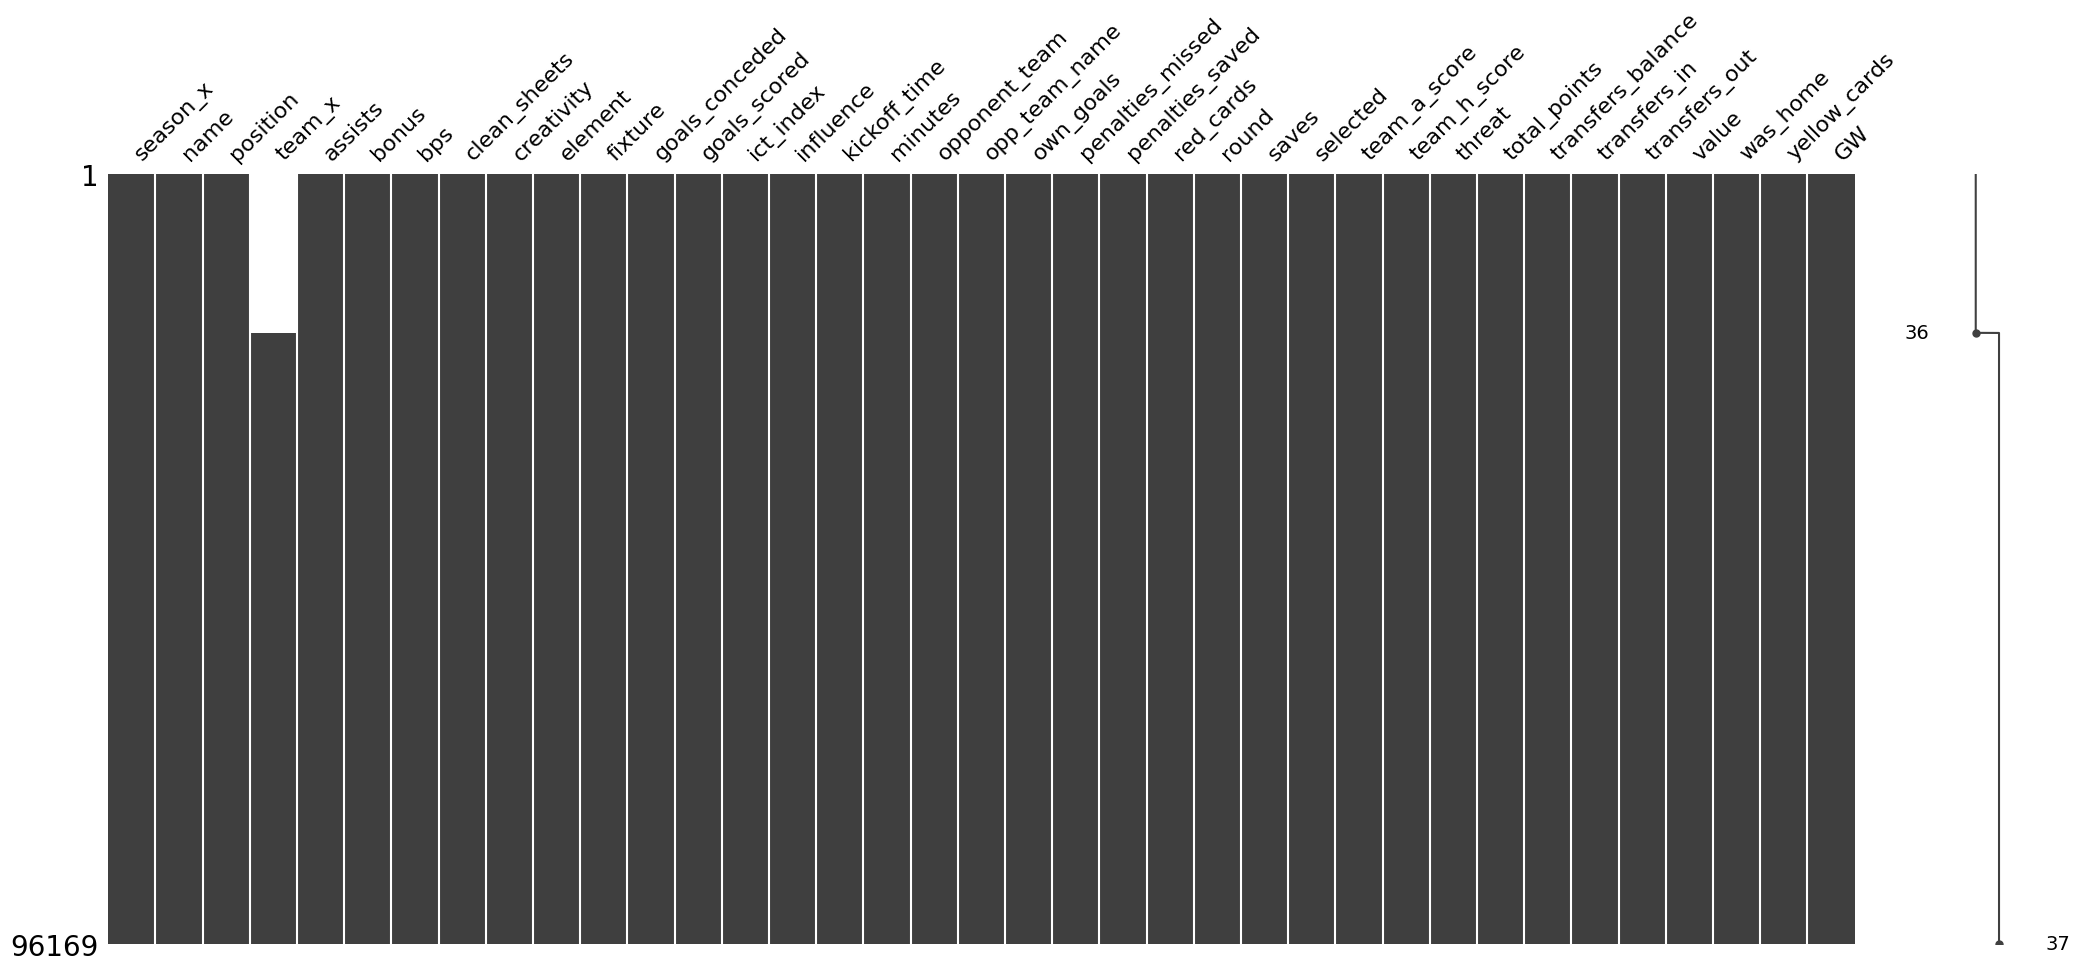

In [8]:
msno.matrix(df)

In [9]:
# listing the list of attributes in the dataset
df.columns.tolist()

['season_x',
 'name',
 'position',
 'team_x',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'opp_team_name',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'total_points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW']

### Filling Null Values in team column

In [10]:
# Fill NaNs in "team_x" within each "name" group using nearest non-null values:
# - Forward fill (ffill) to use the previous value
# - Backward fill (bfill) for any remaining NaNs
df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_1258/3244529142.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


<Axes: >

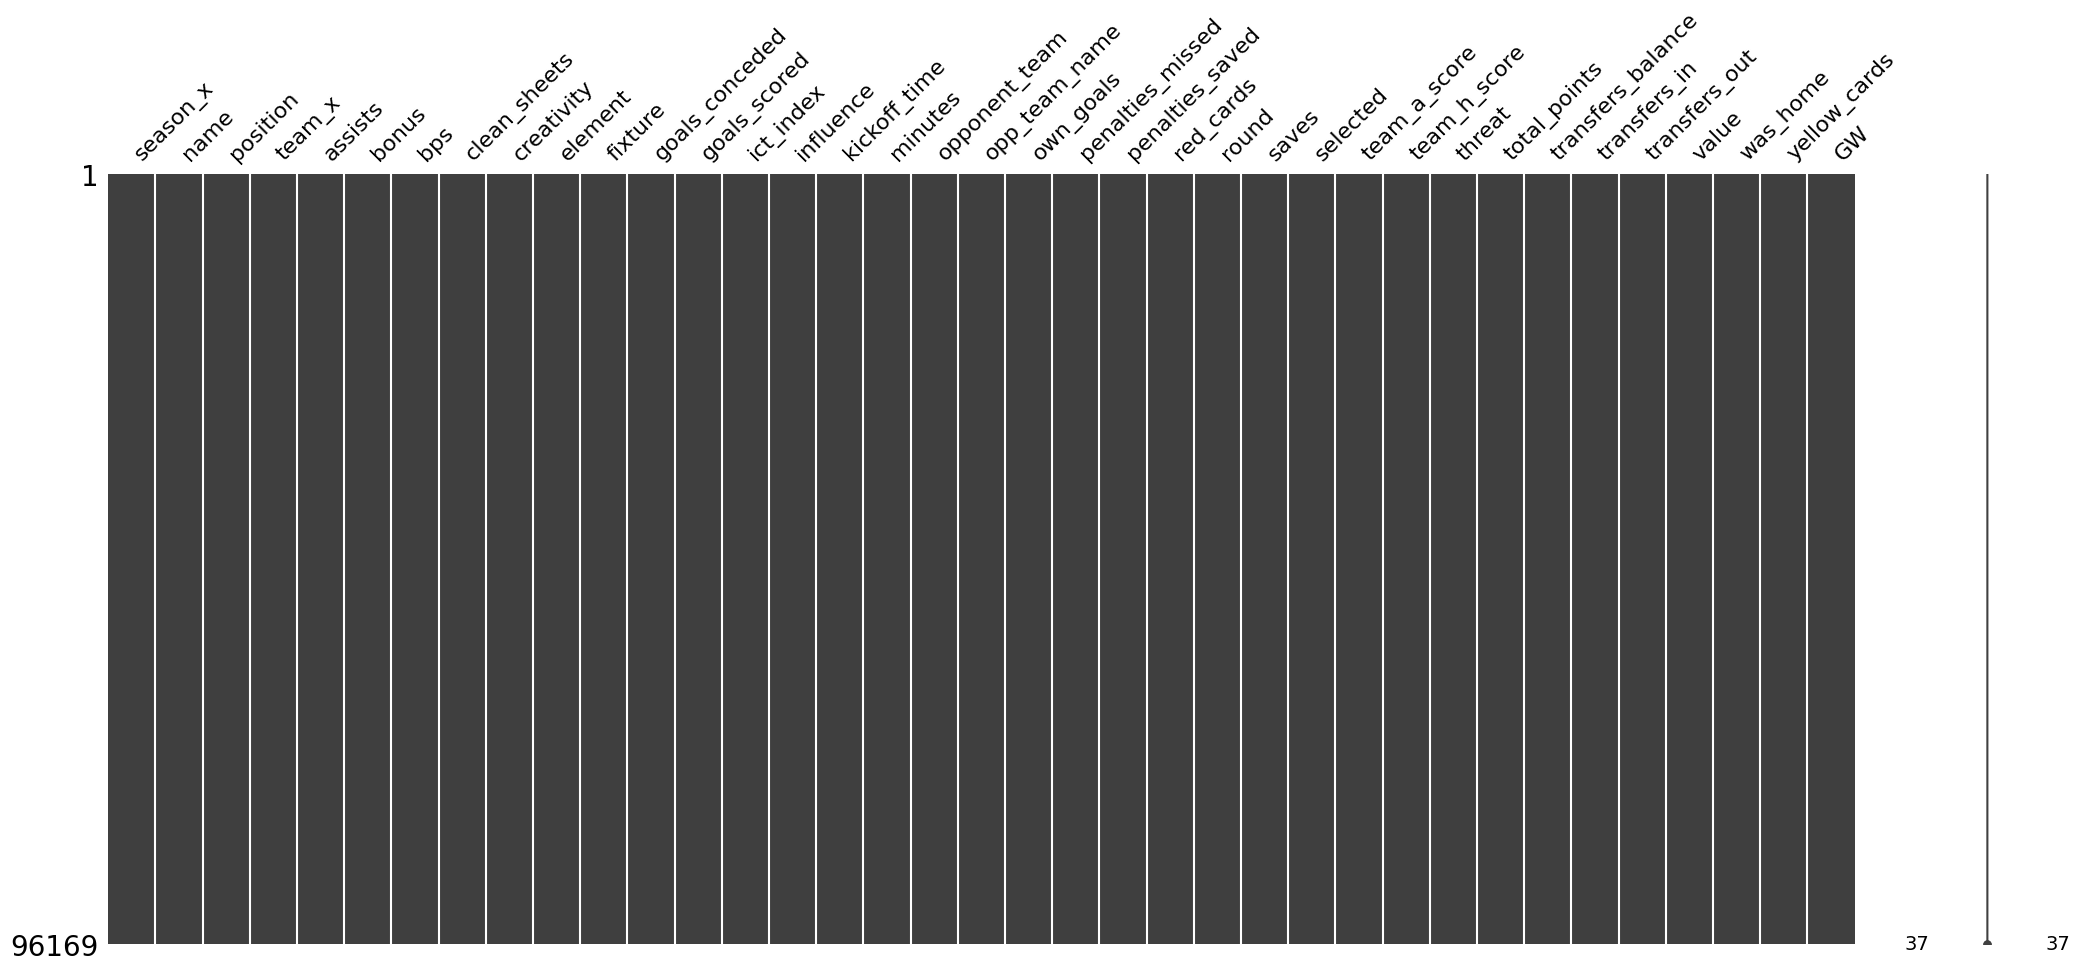

In [11]:
# checking if there is still nan values
msno.matrix(df)

### Chacking for Duplicates

In [12]:
# Check if entire rows are duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Show duplicate rows
duplicate_rows = df[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [season_x, name, position, team_x, assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, opp_team_name, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, GW]
Index: []

[0 rows x 37 columns]


In [13]:
# Check duplicates based on specific columns
duplicates = df.duplicated(subset=['name', 'season_x', 'GW', 'opponent_team', 'team_x'])
print(f"Duplicate players in same season: {duplicates.sum()}")

# Show these duplicates
duplicate_players = df[duplicates]
print(duplicate_players)

Duplicate players in same season: 0
Empty DataFrame
Columns: [season_x, name, position, team_x, assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, opp_team_name, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, GW]
Index: []

[0 rows x 37 columns]


In [18]:
# finding duplicate cells

dupe_groups = (
    
    df.groupby(["name", "GW", "season_x"])
      .size()
      .reset_index(name="count")
)

dupe_groups = dupe_groups[dupe_groups["count"] > 1]
print(dupe_groups)

                  name  GW season_x  count
41      Aaron Connolly  22  2021-22      2
46      Aaron Connolly  25  2021-22      2
54      Aaron Connolly  29  2021-22      2
61      Aaron Connolly  33  2021-22      2
161    Aaron Cresswell  19  2020-21      2
...                ...  ..      ...    ...
90212   Çaglar Söyüncü  36  2021-22      2
90215   Çaglar Söyüncü  37  2021-22      2
90235     Ørjan Nyland  19  2020-21      2
90242     Ørjan Nyland  26  2020-21      2
90251     Ørjan Nyland  35  2020-21      2

[5860 rows x 4 columns]


In [15]:
# printing a cell to ensuring that the cell is duplicate

df[(df["name"] == "Çaglar Söyüncü") & (df["GW"] == 36) & (df["season_x"] == "2021-22")]['opp_team_name']

# salah_2017 = df.loc[(df["name"] == "Çaglar Söyüncü") & (df["season_x"] == "2021-22")]
# salah_2017.count()

67360    Everton
67361    Norwich
Name: opp_team_name, dtype: object

In [16]:
# ensuring that there is a cell for each gameweek

salah_2017 = df.loc[(df["name"] == "Mohamed Salah") & (df["season_x"] == "2020-21")]
salah_2017.count()

season_x             38
name                 38
position             38
team_x               38
assists              38
bonus                38
bps                  38
clean_sheets         38
creativity           38
element              38
fixture              38
goals_conceded       38
goals_scored         38
ict_index            38
influence            38
kickoff_time         38
minutes              38
opponent_team        38
opp_team_name        38
own_goals            38
penalties_missed     38
penalties_saved      38
red_cards            38
round                38
saves                38
selected             38
team_a_score         38
team_h_score         38
threat               38
total_points         38
transfers_balance    38
transfers_in         38
transfers_out        38
value                38
was_home             38
yellow_cards         38
GW                   38
dtype: int64

### Create Form Column for Dataset

In [17]:
def calculate_form_explicit(df):
    """
    More explicit version with better handling of edge cases
    """
    # Sort by player, season, and gameweek
    df_sorted = df.sort_values(['name', 'season_x', 'GW']).copy()
    
    # Initialize form column
    df_sorted['form'] = 0.0
    
    # Group by player and season
    for (player, season), group in df_sorted.groupby(['name', 'season_x']):
        # Get the indices for this player-season combination
        indices = group.index
        
        # Calculate form for each gameweek
        for i, idx in enumerate(indices):
            # Get past 4 gameweeks (including current)
            start_idx = max(0, i - 3)  # Go back 3 more to get 4 total
            end_idx = i + 1
            
            # Calculate average of past 4 gameweeks
            past_points = group.iloc[start_idx:end_idx]['total_points']
            avg_points = past_points.mean()
            
            # Divide by 10
            df_sorted.loc[idx, 'form'] = avg_points / 10
    
    return df_sorted

# Apply the function
df = calculate_form_explicit(df)

<Axes: >

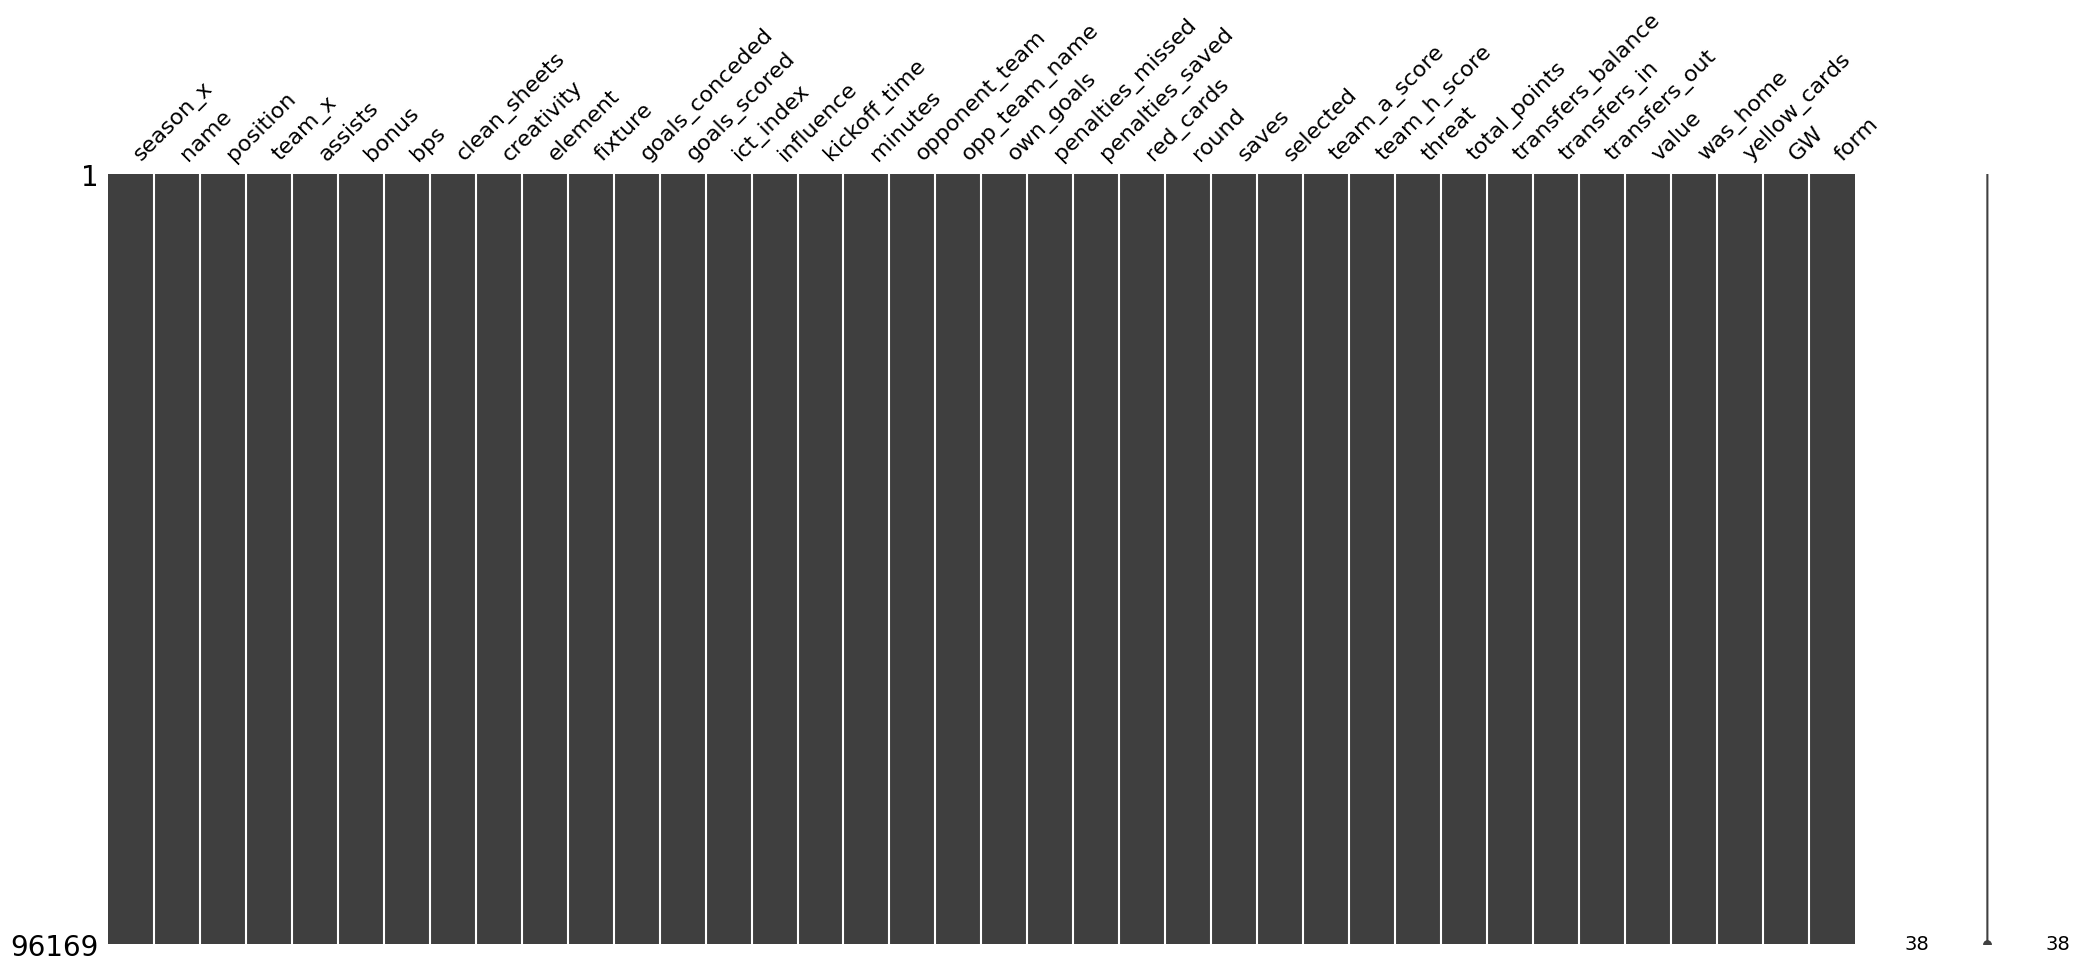

In [18]:
msno.matrix(df)

In [21]:
df[['name','team_x','GW','total_points','form']].head(50)

,name,team_x,GW,total_points,form
19852,Aaron Connolly,Brighton,1,1,0.100000
20277,Aaron Connolly,Brighton,2,8,0.450000
20816,Aaron Connolly,Brighton,3,2,0.366667
21370,Aaron Connolly,Brighton,4,2,0.325000
21932,Aaron Connolly,Brighton,5,4,0.400000
22519,Aaron Connolly,Brighton,6,0,0.200000
23109,Aaron Connolly,Brighton,7,0,0.150000
23706,Aaron Connolly,Brighton,8,1,0.125000
24306,Aaron Connolly,Brighton,9,0,0.025000
24907,Aaron Connolly,Brighton,10,2,0.075000


In [22]:
df['position'] = df['position'].replace('GKP', 'GK')


# Data Engineering Analysis Questions

## Question A: Which player positions score the largest sum of total points on average across seasons?


In [23]:
# Question A: Position Analysis - Total Points Across Seasons

# First, let's examine the position distribution
print("Available positions in the dataset:")
print(df['position'].value_counts())
print("\nPosition mapping:")
position_mapping = {
    'GK': 'Goalkeeper',
    'DEF': 'Defender', 
    'MID': 'Midfielder',
    'FWD': 'Forward'
}
print(position_mapping)


Available positions in the dataset:
position
MID    39163
DEF    33683
FWD    12669
GK     10654
Name: count, dtype: int64

Position mapping:
{'GK': 'Goalkeeper', 'DEF': 'Defender', 'MID': 'Midfielder', 'FWD': 'Forward'}


In [24]:
# group by season and position and get the sum of total points and the count of players
position_stats = (
    df.groupby(['season_x', 'position'])['total_points']
      .agg(['sum', 'count'])
      .round(2)
      .reset_index()
      .rename(columns={'sum': 'total_points_sum', 'count': 'player_count'})
)

print(position_stats)


   season_x position  total_points_sum  player_count
0   2016-17      DEF              5536          3152
1   2016-17      FWD              3180          1402
2   2016-17       GK              1720           904
3   2016-17      MID              6493          3109
4   2017-18      DEF              7018          4102
5   2017-18      FWD              3462          1643
6   2017-18       GK              2220          1281
7   2017-18      MID              8428          4259
8   2020-21      DEF             10461          8626
9   2020-21      FWD              4538          3113
10  2020-21       GK              2872          2768
11  2020-21      MID             13577          9858
12  2021-22      DEF             10568          8620
13  2021-22      FWD              4269          3398
14  2021-22       GK              2724          2910
15  2021-22      MID             13853         10519
16  2022-23      DEF              9943          9183
17  2022-23      FWD              4430        

In [25]:
# Average total points per position across all seasons
avg_points_by_position = (
    position_stats
    .groupby('position')['total_points_sum']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='total_points_sum', ascending=False)
)

print(avg_points_by_position)


  position  total_points_sum
3      MID           11384.4
0      DEF            8705.2
1      FWD            3975.8
2       GK            2463.2


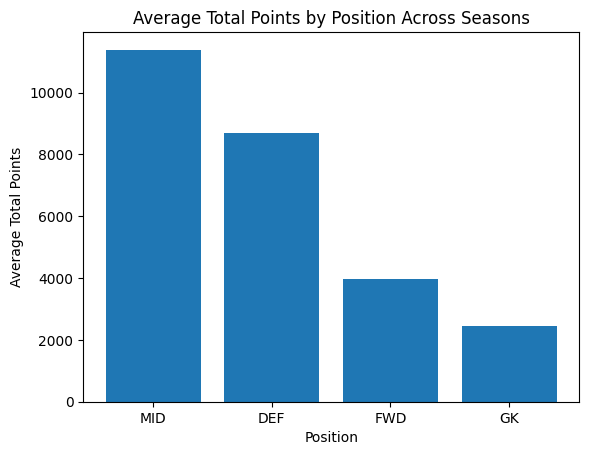

In [26]:
plt.bar(avg_points_by_position['position'], avg_points_by_position['total_points_sum'])
plt.title('Average Total Points by Position Across Seasons')
plt.xlabel('Position')
plt.ylabel('Average Total Points')
plt.show()

### Midfielders consistently have the highest total points across seasons.
### This suggests they contribute the most overall in FPL, on average.

## Question B: Top 5 Players Form Evolution During 2022-23 Season


In [27]:
# Question B: Top 5 Players Analysis for 2022-23 Season

# Filter data for 2022-23 season
df_2022_23 = df[df['season_x'] == '2022-23'].copy()

print(f"Total records for 2022-23 season: {len(df_2022_23)}")
print(f"Unique players in 2022-23: {df_2022_23['name'].nunique()}")
print(f"Gameweeks range: {df_2022_23['GW'].min()} - {df_2022_23['GW'].max()}")

# Check if we have form data
print(f"\nForm column statistics:")
print(df_2022_23['form'].describe())


Total records for 2022-23 season: 26505
Unique players in 2022-23: 777
Gameweeks range: 1 - 38

Form column statistics:
count    26505.000000
mean         0.120237
std          0.173599
min         -0.200000
25%          0.000000
50%          0.025000
75%          0.200000
max          1.500000
Name: form, dtype: float64


In [28]:
# Find top 5 players by total points in 2022-23
player_total_points = df_2022_23.groupby('name')['total_points'].sum().sort_values(ascending=False)
top_5_total_points = player_total_points.head(5)

print("Top 5 Players by Total Points (2022-23):")
for i, (player, points) in enumerate(top_5_total_points.items(), 1):
    print(f"{i}. {player}: {points} points")

# Find top 5 players by average form in 2022-23
player_avg_form = df_2022_23.groupby('name')['form'].mean().sort_values(ascending=False)
top_5_form = player_avg_form.head(5)

print("\nTop 5 Players by Average Form (2022-23):")
for i, (player, form) in enumerate(top_5_form.items(), 1):
    print(f"{i}. {player}: {form:.3f} form")


Top 5 Players by Total Points (2022-23):
1. Erling Haaland: 272 points
2. Harry Kane: 263 points
3. Mohamed Salah: 239 points
4. Martin Ødegaard: 212 points
5. Marcus Rashford: 205 points

Top 5 Players by Average Form (2022-23):
1. Erling Haaland: 0.751 form
2. Harry Kane: 0.661 form
3. Mohamed Salah: 0.642 form
4. Martin Ødegaard: 0.562 form
5. Gabriel Martinelli Silva: 0.552 form


In [29]:
# Compare the two lists
print("Comparison Analysis:")
print("\nPlayers in both top 5 lists:")
common_players = set(top_5_total_points.index) & set(top_5_form.index)
for player in common_players:
    total_rank = list(top_5_total_points.index).index(player) + 1
    form_rank = list(top_5_form.index).index(player) + 1
    print(f"- {player}: #{total_rank} in total points, #{form_rank} in form")

print("\nPlayers only in top 5 total points:")
only_total_points = set(top_5_total_points.index) - set(top_5_form.index)
for player in only_total_points:
    print(f"- {player}")

print("\nPlayers only in top 5 form:")
only_form = set(top_5_form.index) - set(top_5_total_points.index)
for player in only_form:
    print(f"- {player}")


Comparison Analysis:

Players in both top 5 lists:
- Erling Haaland: #1 in total points, #1 in form
- Martin Ødegaard: #4 in total points, #4 in form
- Harry Kane: #2 in total points, #2 in form
- Mohamed Salah: #3 in total points, #3 in form

Players only in top 5 total points:
- Marcus Rashford

Players only in top 5 form:
- Gabriel Martinelli Silva


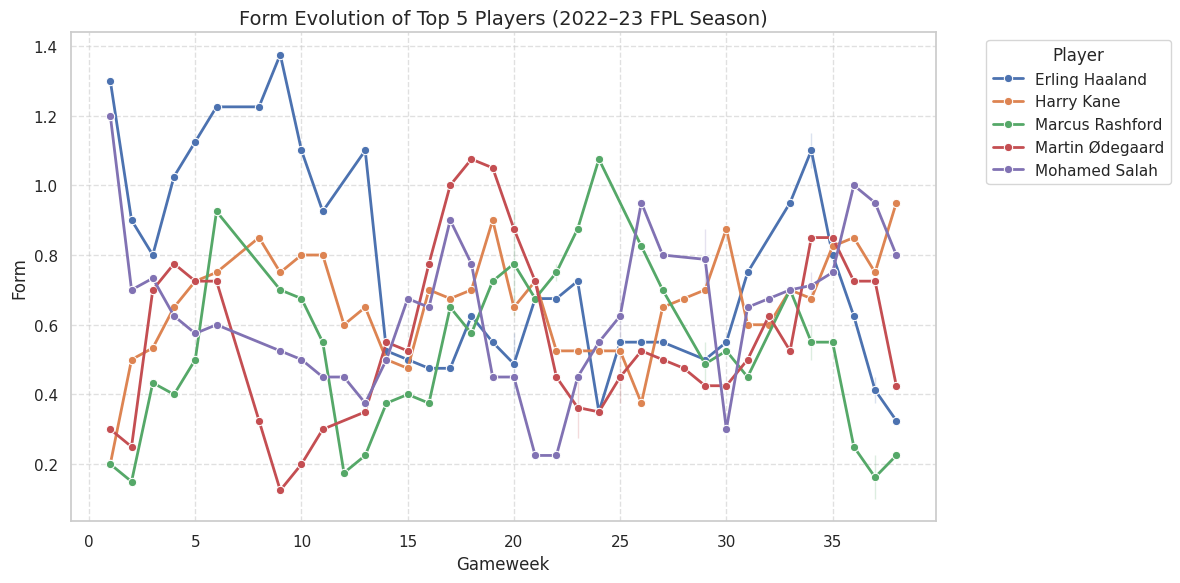

In [37]:
# Visualization for Question B - Form Evolution Analysis

# --- 1️⃣ Filter dataset for 2022–23 season only ---
df_2022_23 = df[df['season_x'] == '2022-23']

# --- 2️⃣ Get top 5 players by total points ---
top_5_players = top_5_total_points.index  # from your code

# --- 3️⃣ Filter only those players ---
top5_data = df_2022_23[df_2022_23['name'].isin(top_5_players)]

# --- 4️⃣ Sort by event (gameweek) for clean plotting ---
top5_data = top5_data.sort_values(by=['GW', 'name'])

# --- 5️⃣ Plot form evolution ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top5_data,
    x='GW', y='form',
    hue='name',
    marker='o',
    linewidth=2
)

# --- 6️⃣ Add labels and title ---
plt.title('Form Evolution of Top 5 Players (2022–23 FPL Season)', fontsize=14)
plt.xlabel('Gameweek', fontsize=12)
plt.ylabel('Form', fontsize=12)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Summary and Conclusions


## Predictive Modeling Task